In [1]:
import os
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt

from   invisible_cities.core.core_functions import in_range
import invisible_cities.core.fit_functions  as fitf
from invisible_cities.core.core_functions import shift_to_bin_centers

from   invisible_cities.reco import tbl_functions as tbl

In [2]:
plt.rcParams["font.size"] = 15

In [3]:
evts_path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_z_map/data_z_map_extract_xy/'

thr_ch_start  = 0
thr_ch_nsteps = 6

true_z1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x1_all  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts1_all   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

true_z1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x1  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts1   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

true_z2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x2_all  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts2_all   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

true_z2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x2  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts2   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

for filename in os.listdir(evts_path):
    if filename.endswith('.npz'):
        my_file = evts_path+filename        
        d = np.load(my_file, allow_pickle=True)
        for j in range(thr_ch_start, thr_ch_nsteps):
            for i in d[f'true_z1_all_{j}']:
                true_z1_all[j].append(i)
            for i in d[f'true_x1_all_{j}']:
                true_x1_all[j].append(i)
            for i in d[f'true_y1_all_{j}']:
                true_y1_all[j].append(i)
            for i in d[f'var_x1_all_{j}']:
                var_x1_all[j].append(i)
            for i in d[f'charge1_all_{j}']:
                charge1_all[j].append(i)
            for i in d[f'evts1_all_{j}']:
                evts1_all[j].append(i)
                
            for i in d[f'true_z1_{j}']:
                true_z1[j].append(i)    
            for i in d[f'true_x1_{j}']:
                true_x1[j].append(i)
            for i in d[f'true_y1_{j}']:
                true_y1[j].append(i)
            for i in d[f'var_x1_{j}']:
                var_x1[j].append(i)
            for i in d[f'charge1_{j}']:
                charge1[j].append(i)
            for i in d[f'evts1_{j}']:
                evts1[j].append(i)

            for i in d[f'true_z2_all_{j}']:
                true_z2_all[j].append(i)
            for i in d[f'true_x2_all_{j}']:
                true_x2_all[j].append(i)
            for i in d[f'true_y2_all_{j}']:
                true_y2_all[j].append(i)
            for i in d[f'var_x2_all_{j}']:
                var_x2_all[j].append(i)
            for i in d[f'charge2_all_{j}']:
                charge2_all[j].append(i)
            for i in d[f'evts2_all_{j}']:
                evts2_all[j].append(i)

            for i in d[f'true_z2_{j}']:
                true_z2[j].append(i)
            for i in d[f'true_x2_{j}']:
                true_x2[j].append(i)
            for i in d[f'true_y2_{j}']:
                true_y2[j].append(i)
            for i in d[f'var_x2_{j}']:
                var_x2[j].append(i)
            for i in d[f'charge2_{j}']:
                charge2[j].append(i)
            for i in d[f'evts2_{j}']:
                evts2[j].append(i)
            
true_z1_all_a = np.array([np.array(i) for i in true_z1_all])
true_x1_all_a = np.array([np.array(i) for i in true_x1_all])
true_y1_all_a = np.array([np.array(i) for i in true_y1_all])
var_x1_all_a  = np.array([np.array(i) for i in var_x1_all ])
charge1_all_a = np.array([np.array(i) for i in charge1_all])
evts1_all_a   = np.array([np.array(i) for i in evts1_all  ])
true_z1_a     = np.array([np.array(i) for i in true_z1    ])
true_x1_a     = np.array([np.array(i) for i in true_x1    ])
true_y1_a     = np.array([np.array(i) for i in true_y1    ])
var_x1_a      = np.array([np.array(i) for i in var_x1     ])
charge1_a     = np.array([np.array(i) for i in charge1    ])
evts1_a       = np.array([np.array(i) for i in evts1      ])
true_z2_all_a = np.array([np.array(i) for i in true_z2_all])
true_x2_all_a = np.array([np.array(i) for i in true_x2_all])
true_y2_all_a = np.array([np.array(i) for i in true_y2_all])
var_x2_all_a  = np.array([np.array(i) for i in var_x2_all ])
charge2_all_a = np.array([np.array(i) for i in charge2_all])
evts2_all_a   = np.array([np.array(i) for i in evts2_all  ])
true_z2_a     = np.array([np.array(i) for i in true_z2    ])
true_x2_a     = np.array([np.array(i) for i in true_x2    ])
true_y2_a     = np.array([np.array(i) for i in true_y2    ])
var_x2_a      = np.array([np.array(i) for i in var_x2     ])
charge2_a     = np.array([np.array(i) for i in charge2    ])
evts2_a       = np.array([np.array(i) for i in evts2      ])

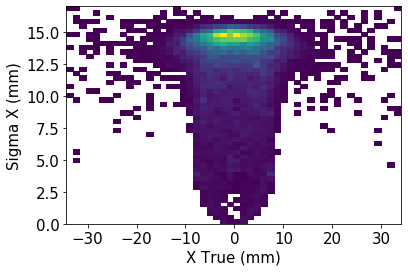

In [15]:
bins   = 50
plt.hist2d(true_x1_a[j], np.sqrt(var_x1_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('X True (mm)')
plt.ylabel('Sigma X (mm)');

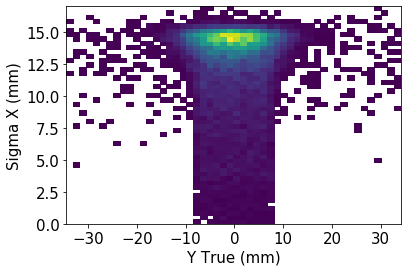

In [19]:
bins   = 50
plt.hist2d(true_y1_a[j], np.sqrt(var_x1_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

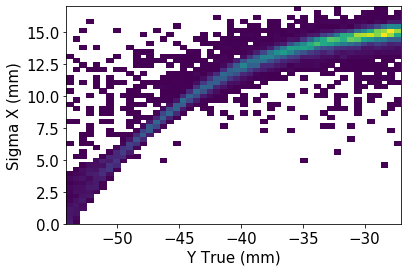

In [20]:
bins   = 50
plt.hist2d(true_z1_a[j], np.sqrt(var_x1_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

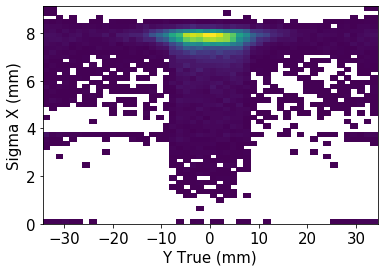

In [21]:
bins   = 50
plt.hist2d(true_y2_a[j], np.sqrt(var_x2_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

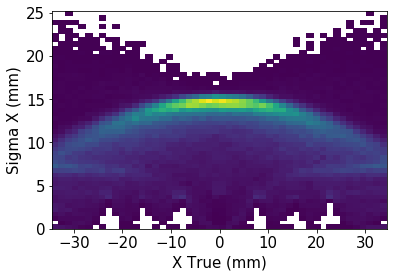

In [24]:
bins   = 50
plt.hist2d(true_x1_all_a[j], np.sqrt(var_x1_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('X True (mm)')
plt.ylabel('Sigma X (mm)');

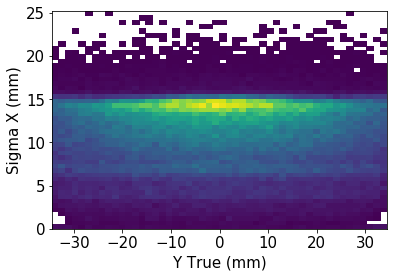

In [23]:
bins   = 50
plt.hist2d(true_y1_all_a[j], np.sqrt(var_x1_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

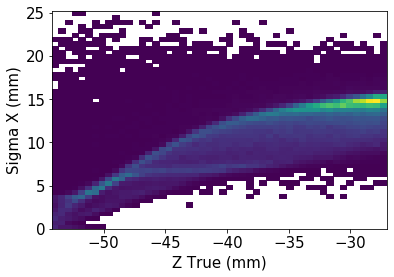

In [25]:
bins   = 50
plt.hist2d(true_z1_all_a[j], np.sqrt(var_x1_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Z True (mm)')
plt.ylabel('Sigma X (mm)');

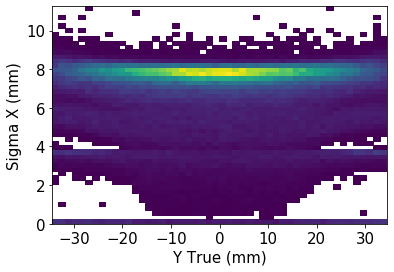

In [26]:
bins   = 50
plt.hist2d(true_y2_all_a[j], np.sqrt(var_x2_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');